<a href="https://colab.research.google.com/github/kushiraj18/2203A52030_Deep-Learning/blob/main/2203A52030_KUSHI_RAJ_KANCU_TEAM_1_DEEP_LEARNING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/hate_speech.csv')

# Display first few rows
print(df.head())

# Show column names and data types
print(df.info())


   class                                              tweet
0      2  !!! RT @mayasolovely: As a woman you shouldn't...
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   24783 non-null  int64 
 1   tweet   24783 non-null  object
dtypes: int64(1), object(1)
memory usage: 387.4+ KB
None


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Load dataset
df = pd.read_csv('/content/hate_speech.csv')

# Optional: Check for nulls
df.dropna(inplace=True)

# Basic text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"#\w+", "", text)     # remove hashtags
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['clean_tweet'] = df['tweet'].apply(clean_text)


In [4]:
# Tokenization
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['clean_tweet'])

sequences = tokenizer.texts_to_sequences(df['clean_tweet'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Encode labels (already numeric, but let's confirm)
labels = df['class'].values


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42, stratify=labels
)


In [6]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 classes

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


279/279 ━━━━━━━━━━━━━━━━━━━━ 43s 142ms/step - accuracy: 0.8110 - loss: 0.5772 - val_accuracy: 0.8971 - val_loss: 0.2922
Epoch 2/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - accuracy: 0.9189 - loss: 0.2496 - val_accuracy: 0.9012 - val_loss: 0.2729
Epoch 3/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 39s 141ms/step - accuracy: 0.9454 - loss: 0.1615 - val_accuracy: 0.9007 - val_loss: 0.2943
Epoch 4/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 40s 142ms/step - accuracy: 0.9611 - loss: 0.1144 - val_accuracy: 0.8956 - val_loss: 0.3469
Epoch 5/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - accuracy: 0.9675 - loss: 0.0944 - val_accuracy: 0.8991 - val_loss: 0.3816


In [7]:
# Final training & validation accuracy from training history
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

#print(f"Final Training Accuracy: {train_acc:.4f}")
#print(f"Final Validation Accuracy: {val_acc:.4f}")

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.8852


155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
              precision    recall  f1-score   support

           0       0.46      0.22      0.30       286
           1       0.91      0.95      0.93      3838
           2       0.82      0.81      0.82       833

    accuracy                           0.89      4957
   macro avg       0.73      0.66      0.68      4957
weighted avg       0.87      0.89      0.88      4957



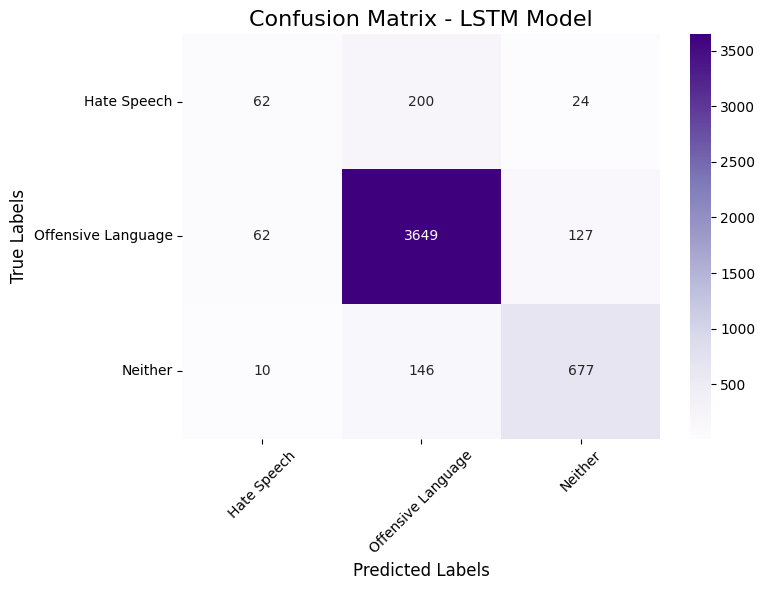

In [8]:
!pip install seaborn
import seaborn as sns
# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plotting colorful confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Hate Speech', 'Offensive Language', 'Neither'], yticklabels=['Hate Speech', 'Offensive Language', 'Neither'])
plt.title('Confusion Matrix - LSTM Model', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [9]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense

# Define the model
model = Sequential()

# Embedding Layer
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(64, return_sequences=False)))

# Dropout Layer to reduce overfitting
model.add(Dropout(0.5))

# Output Layer (3 classes: Hate Speech, Offensive, Neither)
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


279/279 ━━━━━━━━━━━━━━━━━━━━ 77s 256ms/step - accuracy: 0.8068 - loss: 0.5580 - val_accuracy: 0.8981 - val_loss: 0.2984
Epoch 2/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 73s 260ms/step - accuracy: 0.9129 - loss: 0.2670 - val_accuracy: 0.9002 - val_loss: 0.2704
Epoch 3/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 80s 252ms/step - accuracy: 0.9400 - loss: 0.1789 - val_accuracy: 0.8981 - val_loss: 0.3190
Epoch 4/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 71s 255ms/step - accuracy: 0.9559 - loss: 0.1290 - val_accuracy: 0.8976 - val_loss: 0.3349
Epoch 5/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 71s 254ms/step - accuracy: 0.9653 - loss: 0.1036 - val_accuracy: 0.8896 - val_loss: 0.3910


In [10]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8804 - loss: 0.4375
Test Accuracy: 87.80%


In [11]:
from sklearn.metrics import classification_report
import numpy as np

# Predict classes
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # get class with highest probability

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Hate Speech', 'Offensive Language', 'Neither']))


155/155 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step
                    precision    recall  f1-score   support

       Hate Speech       0.47      0.30      0.37       286
Offensive Language       0.91      0.94      0.93      3838
           Neither       0.79      0.80      0.80       833

          accuracy                           0.88      4957
         macro avg       0.73      0.68      0.70      4957
      weighted avg       0.87      0.88      0.87      4957



155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


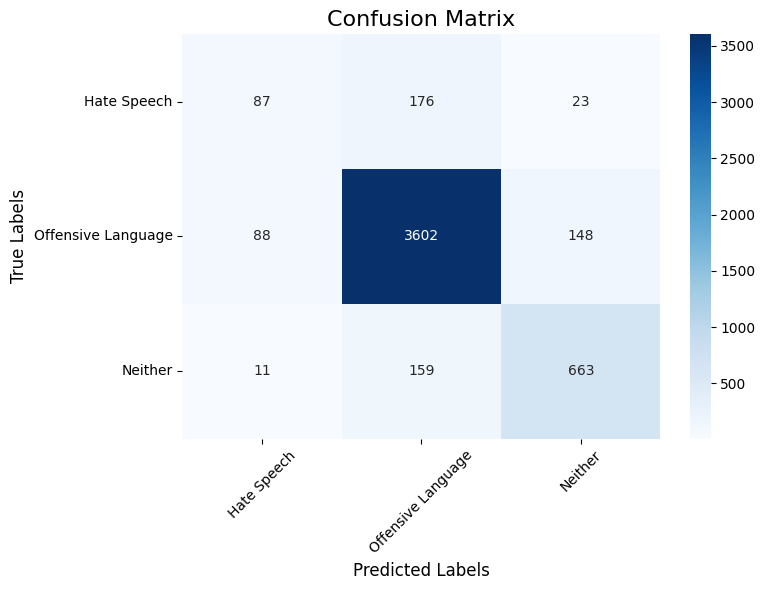

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predicted classes
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class names
class_names = ['Hate Speech', 'Offensive Language', 'Neither']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


279/279 ━━━━━━━━━━━━━━━━━━━━ 43s 144ms/step - accuracy: 0.7969 - loss: 0.5969 - val_accuracy: 0.8966 - val_loss: 0.2988
Epoch 2/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 40s 142ms/step - accuracy: 0.9142 - loss: 0.2577 - val_accuracy: 0.8986 - val_loss: 0.2788
Epoch 3/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 41s 143ms/step - accuracy: 0.9418 - loss: 0.1725 - val_accuracy: 0.9002 - val_loss: 0.3031
Epoch 4/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 41s 143ms/step - accuracy: 0.9597 - loss: 0.1201 - val_accuracy: 0.8946 - val_loss: 0.3437
Epoch 5/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 42s 147ms/step - accuracy: 0.9681 - loss: 0.0935 - val_accuracy: 0.8901 - val_loss: 0.3993
Epoch 1/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 76s 253ms/step - accuracy: 0.8038 - loss: 0.5618 - val_accuracy: 0.8926 - val_loss: 0.3042
Epoch 2/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 83s 257ms/step - accuracy: 0.9138 - loss: 0.2537 - val_accuracy: 0.9032 - val_loss: 0.2661
Epoch 3/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 83s 259ms/step - accuracy: 0.9431 - loss: 0.1731 - val_accura

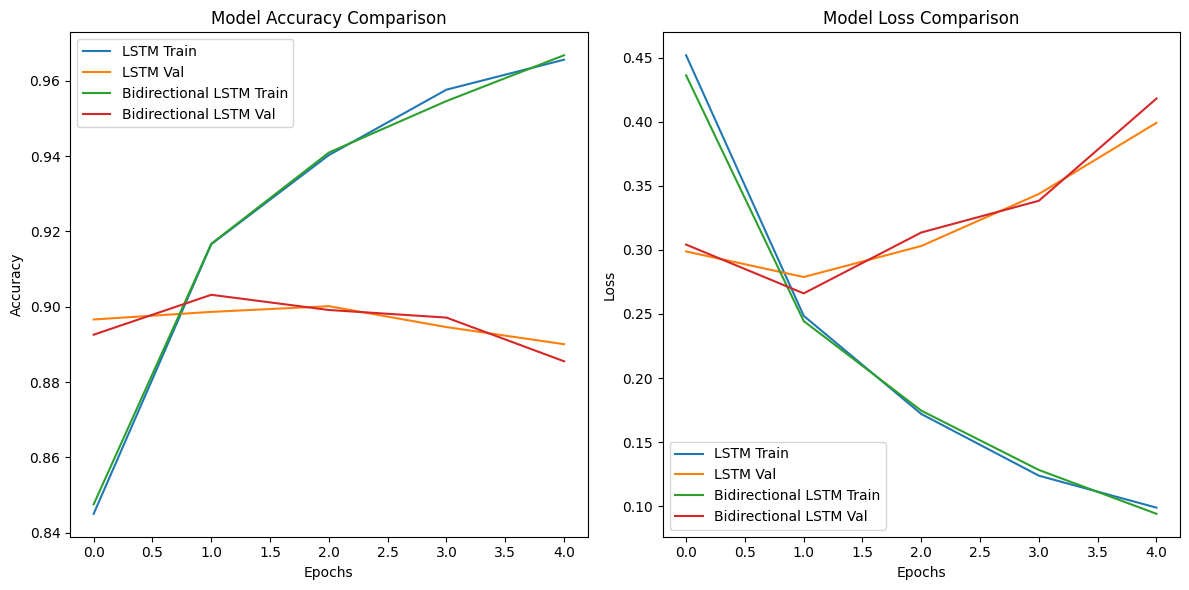

In [13]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense

# Function to plot training and validation metrics
def plot_metrics(history1, history2, model1_name, model2_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label=f'{model1_name} Train')
    plt.plot(history1.history['val_accuracy'], label=f'{model1_name} Val')
    plt.plot(history2.history['accuracy'], label=f'{model2_name} Train')
    plt.plot(history2.history['val_accuracy'], label=f'{model2_name} Val')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label=f'{model1_name} Train')
    plt.plot(history1.history['val_loss'], label=f'{model1_name} Val')
    plt.plot(history2.history['loss'], label=f'{model2_name} Train')
    plt.plot(history2.history['val_loss'], label=f'{model2_name} Val')
    plt.title('Model Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# LSTM Model
model1 = Sequential()
model1.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model1.add(LSTM(64, return_sequences=False))
model1.add(Dropout(0.5))
model1.add(Dense(3, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
history1 = model1.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Bidirectional LSTM Model
model2 = Sequential()
model2.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model2.add(Bidirectional(LSTM(64, return_sequences=False)))
model2.add(Dropout(0.5))
model2.add(Dense(3, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Bidirectional LSTM model
history2 = model2.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Plot comparison of both models
plot_metrics(history1, history2, "LSTM", "Bidirectional LSTM")


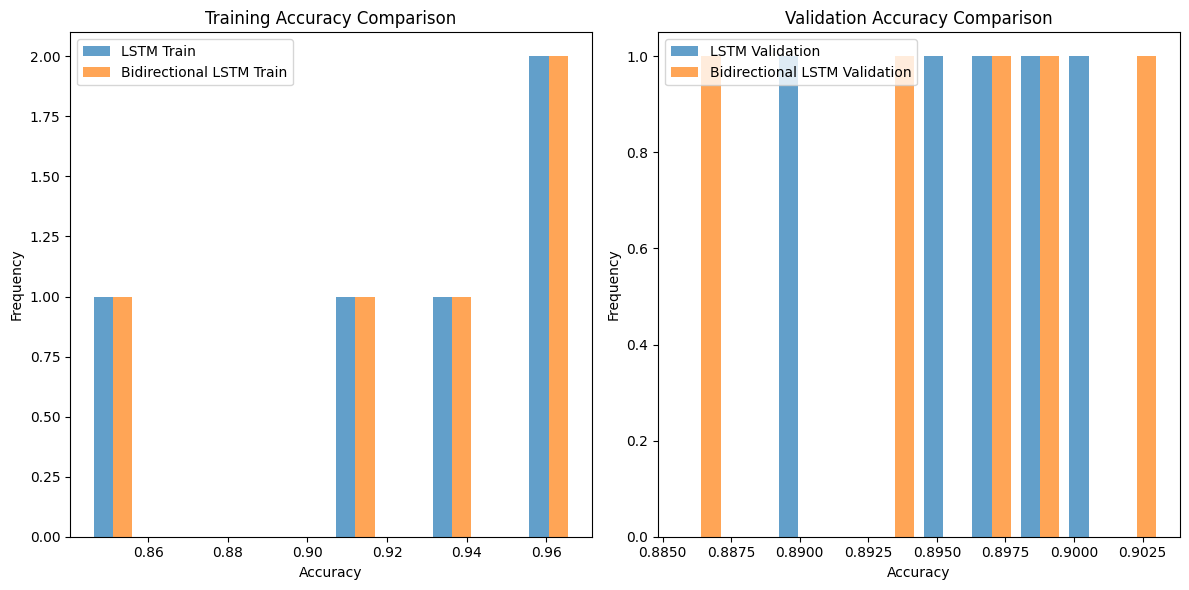

In [14]:
import matplotlib.pyplot as plt

# Function to plot a comparative histogram
def plot_comparative_histogram(history1, history2, model1_name, model2_name):
    # Get accuracy and loss values from the history objects
    accuracy1_train = history1.history['accuracy']
    accuracy2_train = history2.history['accuracy']
    accuracy1_val = history1.history['val_accuracy']
    accuracy2_val = history2.history['val_accuracy']

    # Plot training accuracy comparison
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist([accuracy1_train, accuracy2_train], bins=10, label=[f'{model1_name} Train', f'{model2_name} Train'], alpha=0.7)
    plt.title('Training Accuracy Comparison')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.legend()

    # Plot validation accuracy comparison
    plt.subplot(1, 2, 2)
    plt.hist([accuracy1_val, accuracy2_val], bins=10, label=[f'{model1_name} Validation', f'{model2_name} Validation'], alpha=0.7)
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming you have the history objects for both models: history1 and history2
# Example usage
plot_comparative_histogram(history1, history2, "LSTM", "Bidirectional LSTM")


In [15]:
# Save the entire model to a file
model.save("lstm_hate_speech_model.h5")
print("Model saved as lstm_hate_speech_model.h5")


Model saved as lstm_hate_speech_model.h5


In [16]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model("lstm_hate_speech_model.h5")
print("Model loaded.")


Model loaded.


In [17]:
# Evaluate
test_loss, test_acc = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Loaded Model Test Accuracy: {test_acc:.4f}")


Loaded Model Test Accuracy: 0.8780


In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

def predict_tweet(tweet, model, tokenizer, max_len=100):
    # Clean and tokenize
    cleaned = clean_text(tweet)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_len)

    # Predict
    pred = model.predict(padded)
    pred_class = np.argmax(pred, axis=1)[0]

    # Class labels (0 = hate speech, 1 = offensive, 2 = neither)
    labels = {0: "Hate Speech", 1: "Offensive Language", 2: "Neither"}

    print(f"Tweet: {tweet}")
    print(f"Prediction: {labels[pred_class]} (Class {pred_class})")

# Example usage
predict_tweet("I hate everyone and everything.", model, tokenizer)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Tweet: I hate everyone and everything.
Prediction: Neither (Class 2)
